<a href="https://colab.research.google.com/github/SuryaTeja-aiml/AIML_2303A52007/blob/main/Lab08_AIML_2303A52007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Libraries
Import all necessary libraries for data manipulation, visualization, model training, and evaluation.


In [1]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml


# 2. Load the OpenML Car Dataset
Load the car dataset, explore its structure, and set up the DataFrame.

In [2]:
# Step 2: Load the OpenML Car Dataset
# Fetch the Car Evaluation dataset from OpenML
data = fetch_openml(name="car", version=1, as_frame=True)
df = data.frame

# Print dataset keys to explore structure
print("Dataset Keys:", data.keys())
print("\nFeature names:", data.feature_names)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1027: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/21/car.arff
  warn(


Dataset Keys: dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Feature names: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']


In [3]:
# Describe the dataset to understand its features
print("\nDataset Description:")
print(df.describe(include='all'))


Dataset Description:
       buying maint doors persons lug_boot safety  class
count    1728  1728  1728    1728     1728   1728   1728
unique      4     4     4       3        3      3      4
top      high  high     2       2      big   high  unacc
freq      432   432   432     576      576    576   1210


In [4]:
# Check for missing values in the dataset
print("\nMissing Values:", df.isnull().sum())


Missing Values: buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


# 3. Exploratory Data Analysis (EDA)
Use Seaborn for visualizations and encode categorical features for processing.

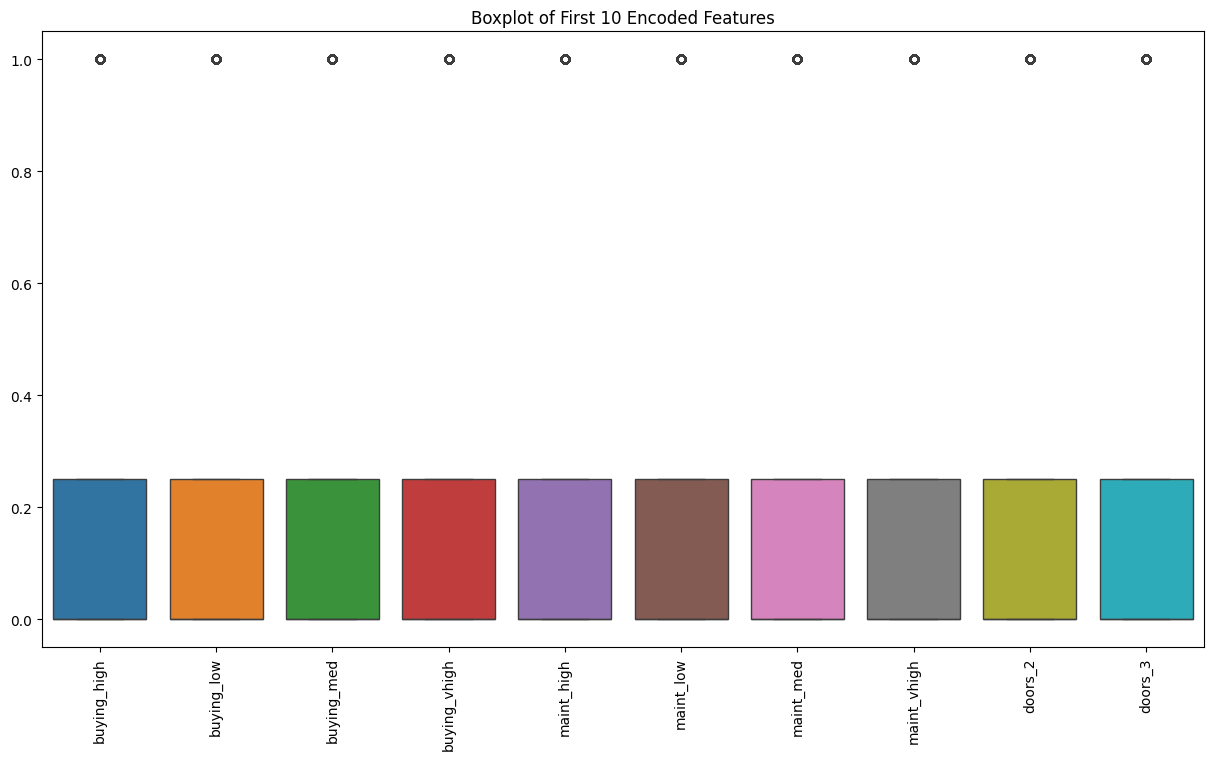

In [5]:
# Step 3: Exploratory Data Analysis
# Encode categorical variables as the dataset is fully categorical
X_encoded = pd.get_dummies(df.drop(columns=['class']))  # Drop target column for EDA
y = df['class']  # Set target variable

# Boxplot of the first 10 encoded features to visualize their distribution
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_encoded.iloc[:, :10])
plt.title("Boxplot of First 10 Encoded Features")
plt.xticks(rotation=90)
plt.show()


# 4. Prepare Train and Test Data
Split data into training and testing sets.

In [6]:
# Step 4: Prepare Train and Test Data
# Assign features (X) and target (y)
X = X_encoded  # Use encoded features
y = df['class']  # Target column


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Train the Decision Tree Model
Initialize and train the DecisionTreeClassifier.

In [8]:
# Step 5: Train the Decision Tree Model
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# 6. Predict and Analyze Performance
Make predictions on the test set and analyze the model’s performance with accuracy, classification report, and confusion matrix.

In [9]:
# Step 6: Predict and Analyze Performance
# Predict on test set
y_pred = dt_model.predict(X_test)

In [10]:
# Generate accuracy score, classification report, and confusion matrix
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.9576107899807321


In [11]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         acc       0.95      0.89      0.92       118
        good       0.75      0.95      0.84        19
       unacc       0.98      0.99      0.99       358
       vgood       0.83      0.79      0.81        24

    accuracy                           0.96       519
   macro avg       0.88      0.91      0.89       519
weighted avg       0.96      0.96      0.96       519



In [12]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[105   4   6   3]
 [  0  18   0   1]
 [  3   0 355   0]
 [  3   2   0  19]]


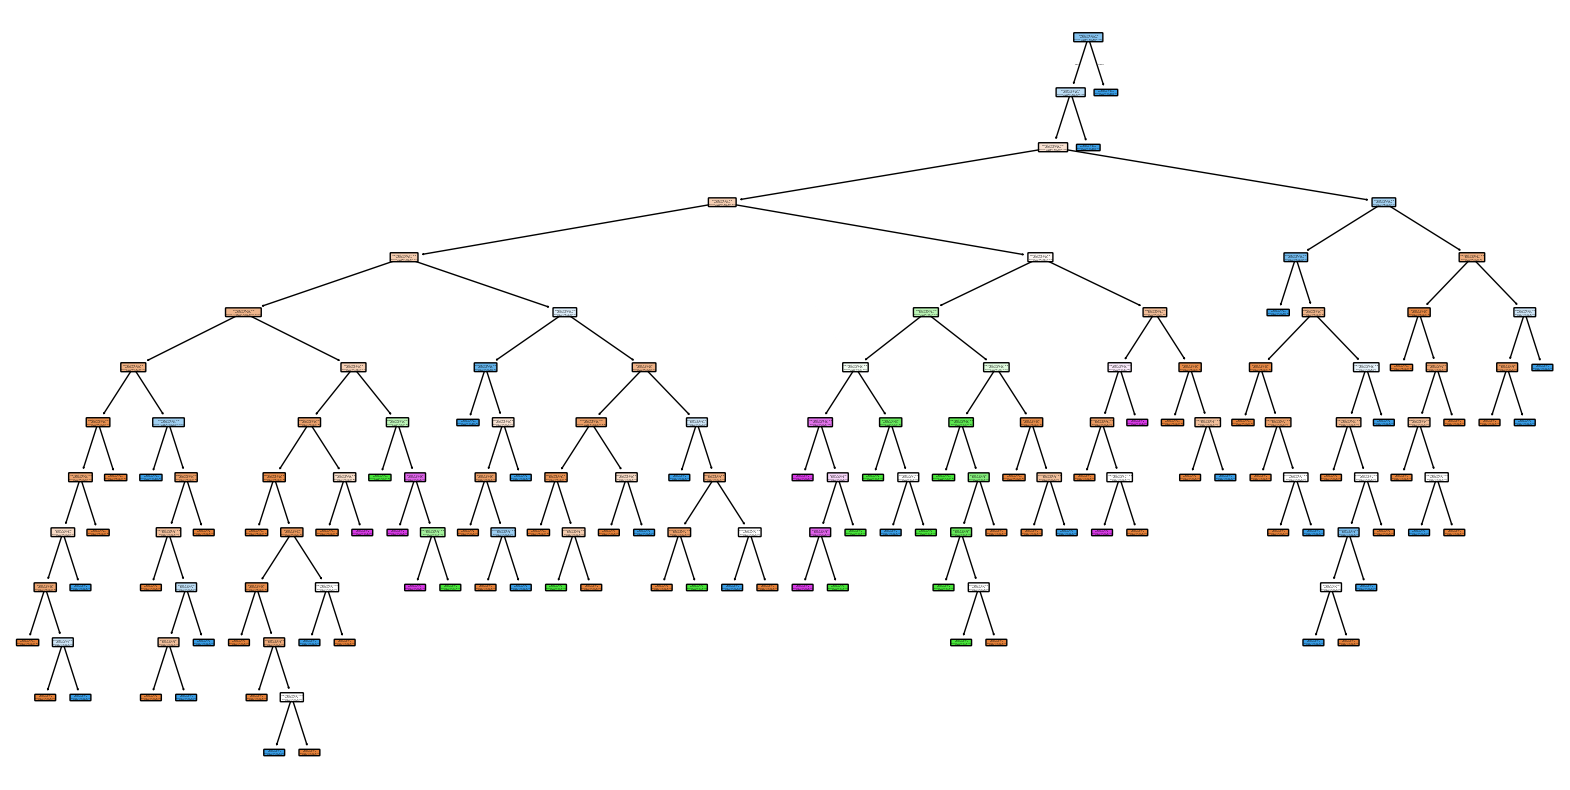

In [13]:
# Visualize the decision tree structure
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True)
plt.show()

# 7. Improve Model Accuracy using GridSearchCV
Use GridSearchCV to fine-tune hyperparameters and enhance the model’s accuracy.

In [14]:
# Step 7: Improve Model Accuracy using GridSearchCV
# Define parameter grid for GridSearchCV specific to Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [15]:
# Display the best parameters found by GridSearchCV
print("\nBest Parameters from GridSearchCV:", grid.best_params_)


Best Parameters from GridSearchCV: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [16]:
# Predict using the best model from GridSearchCV
grid_predictions = grid.predict(X_test)

# Generate improved accuracy score, classification report, and confusion matrix
print("\nImproved Model Accuracy Score:", accuracy_score(y_test, grid_predictions))


Improved Model Accuracy Score: 0.9595375722543352


In [17]:
print("\nImproved Model Classification Report:")
print(classification_report(y_test, grid_predictions))


Improved Model Classification Report:
              precision    recall  f1-score   support

         acc       0.93      0.92      0.92       118
        good       0.70      0.84      0.76        19
       unacc       0.99      0.99      0.99       358
       vgood       0.87      0.83      0.85        24

    accuracy                           0.96       519
   macro avg       0.87      0.89      0.88       519
weighted avg       0.96      0.96      0.96       519



In [18]:
print("\nImproved Model Confusion Matrix:")
print(confusion_matrix(y_test, grid_predictions))


Improved Model Confusion Matrix:
[[108   6   3   1]
 [  1  16   0   2]
 [  4   0 354   0]
 [  3   1   0  20]]
